<a href="https://colab.research.google.com/github/sanjukira/nifty-50-prediction-/blob/main/Final_ml_assignment_automl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset
placement_data = pd.read_csv('/content/nifty 50 high and low.csv')

# Assuming 'CGPA' as the predictor variable and 'Salary' as the target variable
X = placement_data[['High']]
y = placement_data['Low']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Optionally, you can also print the coefficients and intercept of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 3085.454859037847
Mean Absolute Error: 44.58185878464116
Coefficients: [0.97410083]
Intercept: 356.6578809894563


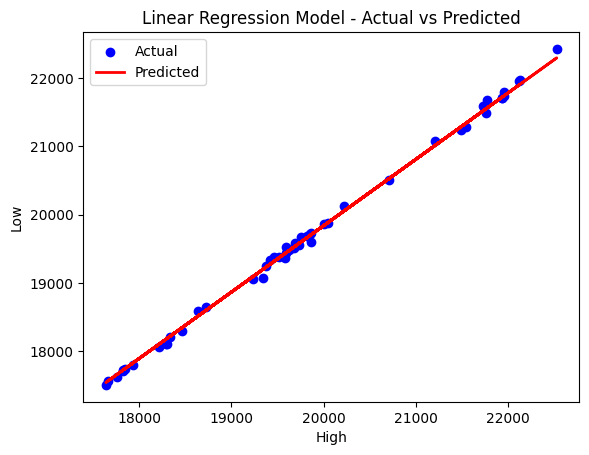

In [ ]:
import matplotlib.pyplot as plt

# Plotting the actual test data
plt.scatter(X_test, y_test, color='blue', label='Actual')

# Plotting the predicted values
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')

# Adding labels and title
plt.xlabel('High')
plt.ylabel('Low')
plt.title('Linear Regression Model - Actual vs Predicted')
plt.legend()

# Display the plot
plt.show()


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,2 mins 07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,18 days
H2O_cluster_name:,H2O_from_python_unknownUser_7v9ef3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███
16:54:04.444: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 196.0.

████████████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
ModelMetricsRegression: drf
** Reported on test data. **

MSE: 8875.764970238406
RMSE: 94.211278360069
MAE: 63.748156425280435
RMSLE: 0.004522981144643006
Mean Residual Deviance: 8875.764970238406


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

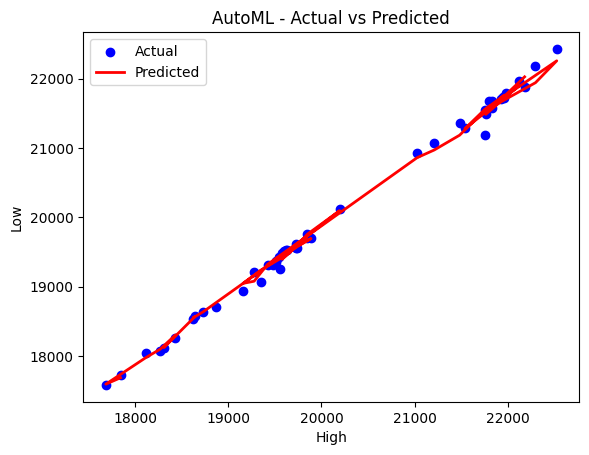

In [ ]:



import pandas as pd
import h2o
from h2o.automl import H2OAutoML
import matplotlib.pyplot as plt

# Initialize and connect to H2O cluster
h2o.init()

# Load the dataset
placement_data = pd.read_csv('/content/nifty 50 high and low.csv')

# Convert the pandas DataFrame to an H2OFrame
h2o_placement_data = h2o.H2OFrame(placement_data)

# Split the data into training and testing sets
train, test = h2o_placement_data.split_frame(ratios=[0.8], seed=42)

# Specify the predictor and target variables
X = ['High']  # Change here to a list
y = 'Low'

# Initialize H2O AutoML
automl = H2OAutoML(max_models=20, seed=42, max_runtime_secs=300)

# Train the models using AutoML
automl.train(x=X, y=y, training_frame=train)

# Get the best model from AutoML
best_model = automl.leader

# Make predictions on the testing set
y_pred = best_model.predict(test)

# Evaluate the model
perf = best_model.model_performance(test)
print(perf)

# Plotting the actual test data
plt.scatter(test[X[0]].as_data_frame(), test[y].as_data_frame(), color='blue', label='Actual')  # Accessing the first element of X list
plt.xlabel(X[0])
plt.ylabel(y)

# Plotting the predicted values
plt.plot(test[X[0]].as_data_frame(), y_pred.as_data_frame(), color='red', linewidth=2, label='Predicted')

# Adding title and legend
plt.title('AutoML - Actual vs Predicted')
plt.legend()

# Display the plot
plt.show()


Mean Squared Error: 13198.415240313356
Mean Absolute Error: 87.95284610969381


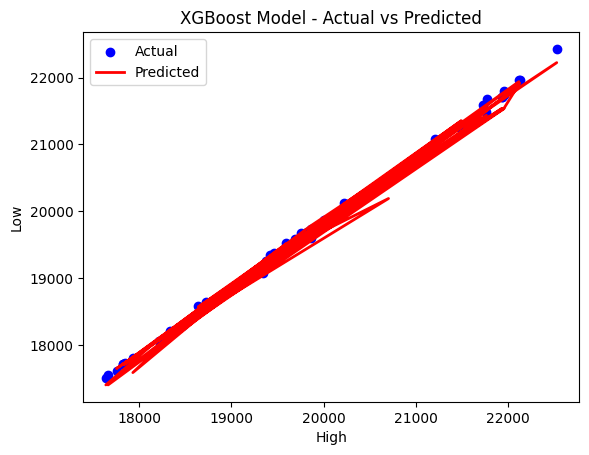

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load the dataset
placement_data = pd.read_csv('/content/nifty 50 high and low.csv')

# Assuming 'High' as the predictor variable and 'Low' as the target variable
X = placement_data[['High']]
y = placement_data['Low']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost regressor model
model = XGBRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Plotting the actual test data
plt.scatter(X_test, y_test, color='blue', label='Actual')

# Plotting the predicted values
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')

# Adding labels and title
plt.xlabel('High')
plt.ylabel('Low')
plt.title('XGBoost Model - Actual vs Predicted')
plt.legend()

# Display the plot
plt.show()


In [ ]:
!pip install --upgrade scikit-learn
!pip install --upgrade tpot

In [ ]:
!pip install flaml

In [ ]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.4/312.4 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.9 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=

In [ ]:
import gradio as gr

In [ ]:
def predict_low(high_value):
    if high_value < 10000:
        return "Value is too low"
    elif high_value > 100000:
        return "Value is too high"
    else:
        return model.predict([[high_value]])[0]

headline = "Nifty 50 Stock Market Prediction"

demo = gr.Interface(fn=predict_low, inputs="number", outputs="text", title=headline, description=y_pred)
demo.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://0c488830f05ebfc2ad.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
